In [3]:
url='https://api.opendota.com/api/heroes/1/matches'
match_response=requests.get(url)
match_data=match_response.json()
df_heroes= pd.DataFrame(match_data)
df_heroes=df_heroes.to_csv('heroe_am.csv', index=False)


In [4]:
df_heroes_am=pd.read_csv(r'C:\Users\apltk\heroe_am.csv')
df_heroes_am.head(5)

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7568811834,1707038486,2644,False,16169,BetBoom Dacha Dubai 2024,False,3,375507918,10,4,2
1,7568781105,1707038851,2538,False,16169,BetBoom Dacha Dubai 2024,True,132,898754153,8,1,7
2,7568536581,1707021267,2927,True,16077,NADCL Season 6,True,0,89955365,10,5,11
3,7568444207,1707013455,576,False,16077,NADCL Season 6,False,4,79023108,0,2,1
4,7568347205,1707004340,1401,True,16109,Dota 2 Space League,False,130,341654420,1,2,0


In [2]:
import pandas as pd
import numpy as np
import csv
import json
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
import requests

In [6]:
df_heroes_am.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,1.000000e+02,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000
mean,7.555249e+09,1.706262e+09,1947.100000,15857.860000,65.520000,5.511676e+08,7.680000,4.200000,6.68000
std,7.881278e+06,4.524669e+05,594.106706,623.340836,64.477148,4.565027e+08,5.631585,2.912876,5.04501
min,7.539952e+09,1.705396e+09,576.000000,12903.000000,0.000000,5.698168e+07,0.000000,0.000000,0.00000
25%,7.549494e+09,1.705924e+09,1595.000000,15901.000000,1.000000,1.813393e+08,3.000000,2.000000,3.00000
50%,7.555646e+09,1.706290e+09,1882.500000,15956.500000,66.000000,3.416544e+08,6.500000,4.000000,6.00000
75%,7.561787e+09,1.706633e+09,2318.000000,16109.000000,130.000000,9.126552e+08,11.000000,7.000000,11.00000
max,7.568812e+09,1.707039e+09,3384.000000,16190.000000,132.000000,1.661162e+09,24.000000,12.000000,21.00000


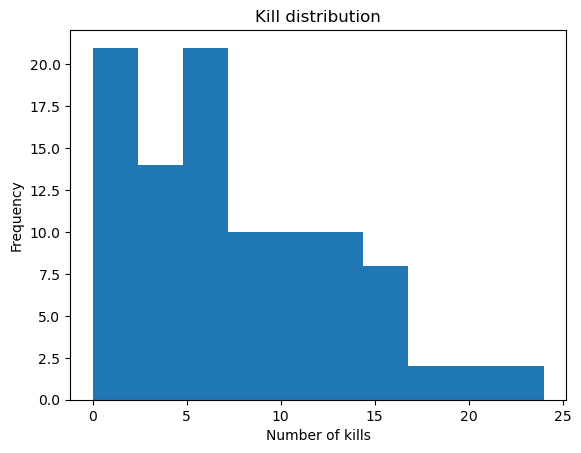

In [7]:
df_heroes_am['kills'].plot(kind='hist', bins=10, title='Kill distribution')
plt.xlabel('Number of kills')
plt.ylabel('Frequency')
plt.show()

In [8]:
df_heroes_am.head(10)

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7568811834,1707038486,2644,False,16169,BetBoom Dacha Dubai 2024,False,3,375507918,10,4,2
1,7568781105,1707038851,2538,False,16169,BetBoom Dacha Dubai 2024,True,132,898754153,8,1,7
2,7568536581,1707021267,2927,True,16077,NADCL Season 6,True,0,89955365,10,5,11
3,7568444207,1707013455,576,False,16077,NADCL Season 6,False,4,79023108,0,2,1
4,7568347205,1707004340,1401,True,16109,Dota 2 Space League,False,130,341654420,1,2,0
5,7567911645,1706982551,1378,True,15901,Ultras Dota Pro League 2023-24,False,128,316461744,3,7,0
6,7567513076,1706968963,1671,False,15898,European Pro League 2023-2024 Season,False,4,345509021,2,0,2
7,7566741044,1706931544,2562,True,16077,NADCL Season 6,True,0,83379921,19,2,19
8,7566735553,1706931114,2104,True,16077,NADCL Season 6,False,132,115075449,10,7,4
9,7566717109,1706929625,2962,True,16077,NADCL Season 6,False,130,416784721,4,7,14


In [9]:
winstat=df_heroes_am[(df_heroes_am['radiant_win']==True) & (df_heroes_am['radiant'] == True)]
winstat.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
2,7568536581,1707021267,2927,True,16077,NADCL Season 6,True,0,89955365,10,5,11
7,7566741044,1706931544,2562,True,16077,NADCL Season 6,True,0,83379921,19,2,19
10,7565358468,1706860365,2051,True,15716,Destiny league,True,2,1068676453,16,2,6
18,7563369597,1706727115,1997,True,15901,Ultras Dota Pro League 2023-24,True,0,316461744,11,5,11
20,7562933682,1706709631,2452,True,15901,Ultras Dota Pro League 2023-24,True,1,1598219170,14,2,7


In [10]:
winstat[winstat['radiant_win']].count()

match_id       26
start_time     26
duration       26
radiant_win    26
leagueid       26
league_name    26
radiant        26
player_slot    26
account_id     26
kills          26
deaths         26
assists        26
dtype: int64

In [11]:
len(winstat)

26

In [12]:
losestat=df_heroes_am[(df_heroes_am['radiant_win']==False) & (df_heroes_am['radiant'] == True)]
losestat.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
1,7568781105,1707038851,2538,False,16169,BetBoom Dacha Dubai 2024,True,132,898754153,8,1,7
11,7565325255,1706857856,1589,False,15716,Destiny league,True,130,1068676453,11,1,5
14,7565029887,1706828806,3034,False,15899,EPL World Series: America 2023-2024 Season,True,128,874981361,7,8,10
15,7564619068,1706806272,1331,False,16172,Infiwin Ace Cup,True,128,230266029,4,1,4
23,7562099757,1706648345,2058,False,16109,Dota 2 Space League,True,128,198356771,12,5,9


In [13]:
len(losestat)

22

In [14]:
losestat2=df_heroes_am[(df_heroes_am['radiant_win']==True) & (df_heroes_am['radiant'] == False)]
losestat2.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
4,7568347205,1707004340,1401,True,16109,Dota 2 Space League,False,130,341654420,1,2,0
5,7567911645,1706982551,1378,True,15901,Ultras Dota Pro League 2023-24,False,128,316461744,3,7,0
8,7566735553,1706931114,2104,True,16077,NADCL Season 6,False,132,115075449,10,7,4
9,7566717109,1706929625,2962,True,16077,NADCL Season 6,False,130,416784721,4,7,14
12,7565304392,1706856101,1283,True,16190,MESA Champions: Winter,False,129,475226381,2,3,3


In [15]:
winstat2=df_heroes_am[(df_heroes_am['radiant_win']==False) & (df_heroes_am['radiant'] == False)]
winstat2.head()

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7568811834,1707038486,2644,False,16169,BetBoom Dacha Dubai 2024,False,3,375507918,10,4,2
3,7568444207,1707013455,576,False,16077,NADCL Season 6,False,4,79023108,0,2,1
6,7567513076,1706968963,1671,False,15898,European Pro League 2023-2024 Season,False,4,345509021,2,0,2
13,7565161196,1706842844,1201,False,15819,Ancients League,False,2,1524633248,1,3,1
19,7563191436,1706719214,1584,False,15901,Ultras Dota Pro League 2023-24,False,0,316461744,5,7,3


In [16]:
win=len(winstat)+len(winstat2)
win

50

In [17]:
lose=len(losestat)+len(losestat2)
lose

50

In [18]:
df_heroes_am[df_heroes_am['duration']>2300]

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
0,7568811834,1707038486,2644,False,16169,BetBoom Dacha Dubai 2024,False,3,375507918,10,4,2
1,7568781105,1707038851,2538,False,16169,BetBoom Dacha Dubai 2024,True,132,898754153,8,1,7
2,7568536581,1707021267,2927,True,16077,NADCL Season 6,True,0,89955365,10,5,11
7,7566741044,1706931544,2562,True,16077,NADCL Season 6,True,0,83379921,19,2,19
9,7566717109,1706929625,2962,True,16077,NADCL Season 6,False,130,416784721,4,7,14
14,7565029887,1706828806,3034,False,15899,EPL World Series: America 2023-2024 Season,True,128,874981361,7,8,10
20,7562933682,1706709631,2452,True,15901,Ultras Dota Pro League 2023-24,True,1,1598219170,14,2,7
34,7559428181,1706484962,2615,True,16140,ESL One Birmingham 2024 Qualifiers powered by ...,True,0,86745912,12,3,6
39,7557852659,1706407959,2883,False,16140,ESL One Birmingham 2024 Qualifiers powered by ...,True,131,177203952,13,2,12
40,7557812714,1706404243,2820,True,16077,NADCL Season 6,True,0,135178273,21,5,18


In [19]:
2300/60

38.333333333333336

In [20]:
concatenated_df = pd.concat([winstat, winstat2])
concatenated_df

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
2,7568536581,1707021267,2927,True,16077,NADCL Season 6,True,0,89955365,10,5,11
7,7566741044,1706931544,2562,True,16077,NADCL Season 6,True,0,83379921,19,2,19
10,7565358468,1706860365,2051,True,15716,Destiny league,True,2,1068676453,16,2,6
18,7563369597,1706727115,1997,True,15901,Ultras Dota Pro League 2023-24,True,0,316461744,11,5,11
20,7562933682,1706709631,2452,True,15901,Ultras Dota Pro League 2023-24,True,1,1598219170,14,2,7
27,7561671460,1706628569,1885,True,15901,Ultras Dota Pro League 2023-24,True,1,189817721,2,7,6
31,7559787535,1706519224,1880,True,16108,2024 New Year Cup,True,0,401653350,9,1,12
34,7559428181,1706484962,2615,True,16140,ESL One Birmingham 2024 Qualifiers powered by ...,True,0,86745912,12,3,6
35,7558833563,1706455399,2248,True,16012,蜜的耐神闹Meternational S2,True,1,364050071,17,4,13
37,7558455414,1706443237,1850,True,16140,ESL One Birmingham 2024 Qualifiers powered by ...,True,0,185908355,10,0,4


In [21]:
concatenated_lose = pd.concat([losestat, losestat2])
concatenated_lose

,match_id,start_time,duration,radiant_win,leagueid,league_name,radiant,player_slot,account_id,kills,deaths,assists
1,7568781105,1707038851,2538,False,16169,BetBoom Dacha Dubai 2024,True,132,898754153,8,1,7
11,7565325255,1706857856,1589,False,15716,Destiny league,True,130,1068676453,11,1,5
14,7565029887,1706828806,3034,False,15899,EPL World Series: America 2023-2024 Season,True,128,874981361,7,8,10
15,7564619068,1706806272,1331,False,16172,Infiwin Ace Cup,True,128,230266029,4,1,4
23,7562099757,1706648345,2058,False,16109,Dota 2 Space League,True,128,198356771,12,5,9
26,7561676044,1706628747,1812,False,15901,Ultras Dota Pro League 2023-24,True,131,1598219170,16,2,7
28,7561027575,1706593161,1781,False,15716,Destiny league,True,130,181339278,9,2,2
39,7557852659,1706407959,2883,False,16140,ESL One Birmingham 2024 Qualifiers powered by ...,True,131,177203952,13,2,12
48,7555859375,1706299778,2737,False,16109,Dota 2 Space League,True,128,146544150,8,9,12
51,7554922679,1706258632,1439,False,15901,Ultras Dota Pro League 2023-24,True,130,1598219170,9,1,7


In [37]:
concatenated_df.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,4.100000e+01,4.100000e+01,41.000000,41.000000,41.000000,4.100000e+01,41.000000,41.000000,41.000000
mean,7.465777e+09,1.701404e+09,2059.024390,15634.341463,1.463415,7.923220e+08,9.170732,3.487805,9.268293
std,2.508705e+07,1.284766e+06,504.109288,678.337733,1.518182,5.587102e+08,5.589734,2.589613,5.809580
min,7.420584e+09,1.699192e+09,1069.000000,12903.000000,0.000000,5.698168e+07,0.000000,0.000000,0.000000
25%,7.438851e+09,1.699974e+09,1753.000000,15716.000000,0.000000,2.415196e+08,5.000000,1.000000,5.000000
50%,7.473416e+09,1.701763e+09,2019.000000,15819.000000,1.000000,1.001005e+09,9.000000,3.000000,9.000000
75%,7.486582e+09,1.702490e+09,2204.000000,15909.000000,3.000000,1.213509e+09,12.000000,5.000000,14.000000
max,7.495682e+09,1.702977e+09,3474.000000,16012.000000,4.000000,1.616488e+09,24.000000,10.000000,20.000000


In [22]:
concatenated_lose.describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,5.000000e+01,5.000000e+01,50.000000,50.000000,50.000000,5.000000e+01,50.000000,50.000000,50.000000
mean,7.554952e+09,1.706245e+09,1927.520000,15796.500000,129.660000,6.150755e+08,7.440000,4.300000,5.820000
std,7.971453e+06,4.580782e+05,630.183266,754.793234,1.394011,4.782012e+08,5.862924,3.163891,4.447838
min,7.539952e+09,1.705396e+09,633.000000,12903.000000,128.000000,5.698168e+07,0.000000,0.000000,0.000000
25%,7.549705e+09,1.705933e+09,1461.500000,15901.000000,128.000000,2.063341e+08,2.250000,2.000000,2.000000
50%,7.553064e+09,1.706142e+09,1805.500000,15901.000000,130.000000,3.819053e+08,6.500000,4.000000,5.000000
75%,7.561727e+09,1.706631e+09,2185.250000,16109.000000,131.000000,1.048676e+09,10.000000,7.000000,9.000000
max,7.568781e+09,1.707039e+09,3384.000000,16190.000000,132.000000,1.661162e+09,24.000000,11.000000,17.000000


In [23]:
matches_above_2200=len(concatenated_df[concatenated_df['duration']>2200])
matches_below_2200=len(concatenated_df[concatenated_df['duration']<2200])

In [24]:
matches_above_2200_=len(concatenated_lose[concatenated_lose['duration']>2200])
matches_below_2200_=len(concatenated_lose[concatenated_lose['duration']<2200])

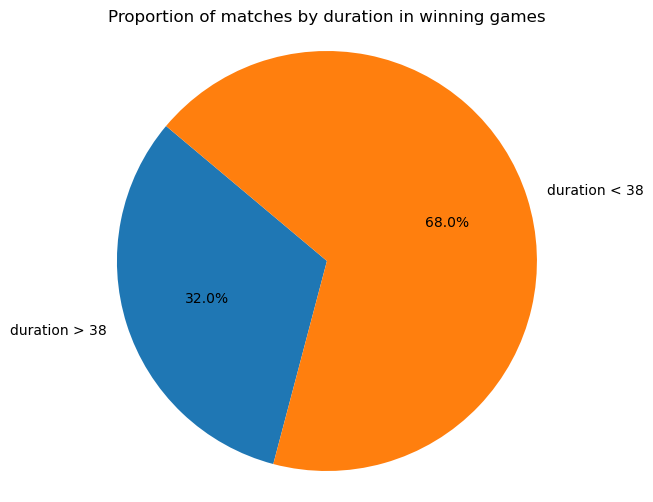

In [25]:
# Proportion of matches by duration(min) in winning games
values = [matches_above_2200, matches_below_2200]
labels = ['duration > 38', 'duration < 38']


plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of matches by duration in winning games')
plt.axis('equal')  
plt.show()

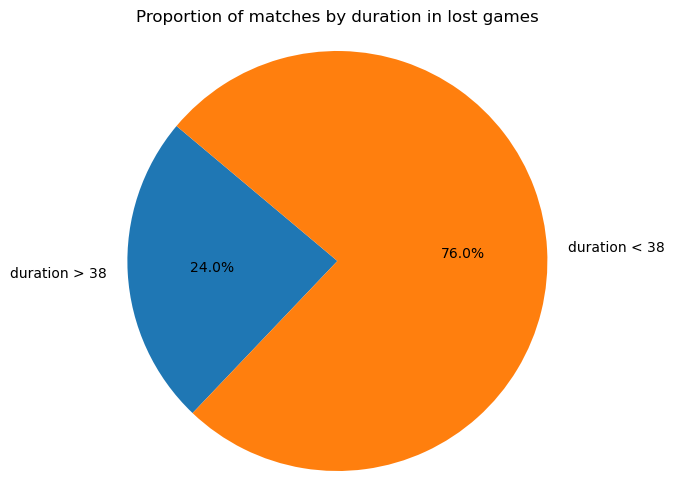

In [26]:
# Proportion of matches by duration in lost games
values = [matches_above_2200_, matches_below_2200_]
labels = ['duration > 38', 'duration < 38']

# Построение круговой диаграммы
plt.figure(figsize=(8, 6))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of matches by duration in lost games')
plt.axis('equal')  
plt.show()

In [27]:
average_kills_wins = concatenated_df['kills'].mean()
average_kills_wins

7.92

In [28]:
average_kills_lose = concatenated_lose['kills'].mean()
average_kills_lose

7.44

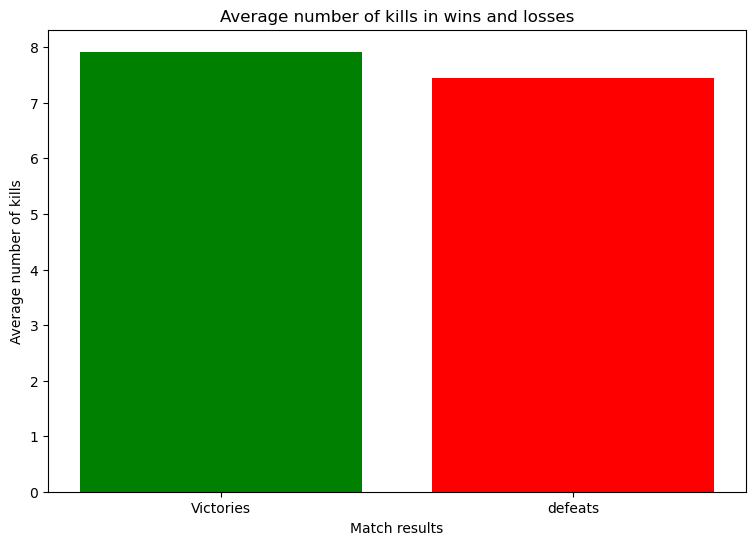

In [29]:
average_kills = [average_kills_wins, average_kills_lose]
labels = ['Victories', 'defeats']

# Построение гистограммы
plt.figure(figsize=(9, 6))
plt.bar(labels, average_kills, color=['green', 'red'])
plt.title('Average number of kills in wins and losses')
plt.xlabel('Match results')
plt.ylabel('Average number of kills')
plt.show()

C:\Users\apltk\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


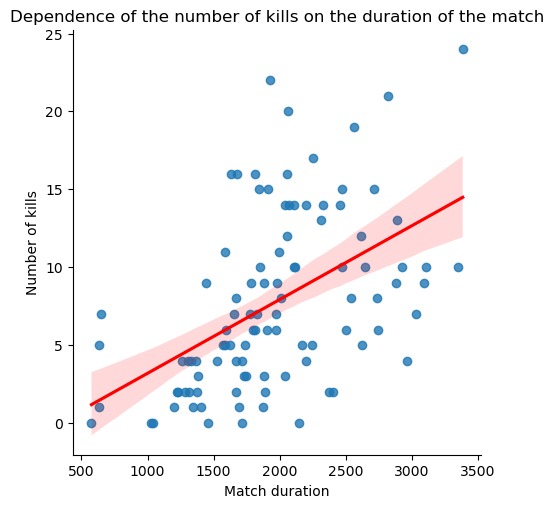

In [30]:
import seaborn as sns

# Building a regression model and scatter plot
sns.lmplot(x='duration', y='kills', data=df_heroes_am, line_kws={'color': 'red'})
plt.title('Dependence of the number of kills on the duration of the match')
plt.xlabel('Match duration')
plt.ylabel('Number of kills')
plt.show()

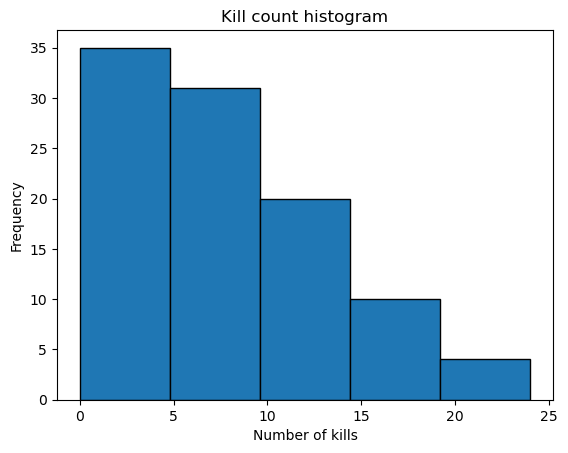

In [31]:
df_heroes_am['kills'].plot(kind='hist', bins=5, edgecolor='black')  # bins - количество столбцов на гистограмме
plt.title('Kill count histogram')
plt.xlabel('Number of kills')
plt.ylabel('Frequency')
plt.show()

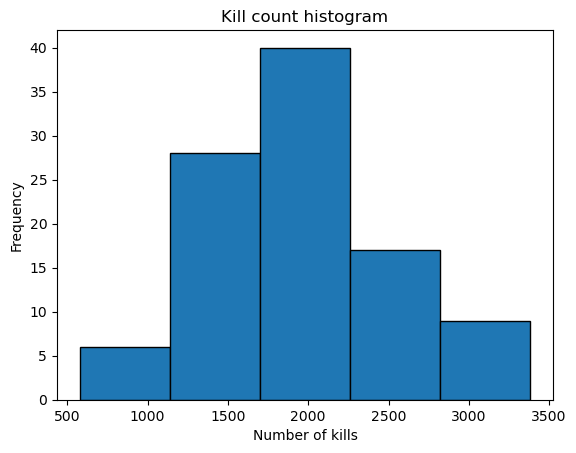

In [32]:
df_heroes_am['duration'].plot(kind='hist', bins=5, edgecolor='black')  
plt.title('Kill count histogram')
plt.xlabel('Number of kills')
plt.ylabel('Frequency')
plt.show()

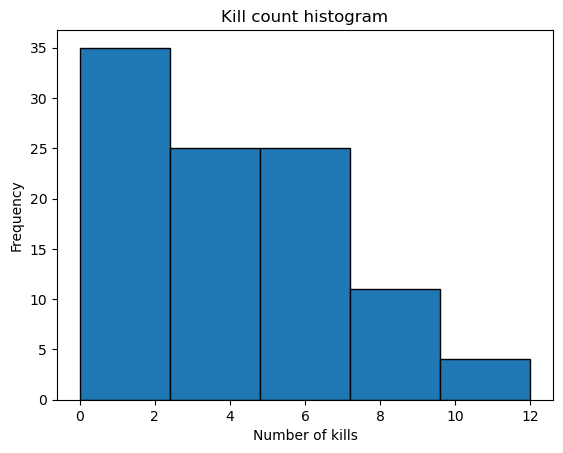

In [33]:
df_heroes_am['deaths'].plot(kind='hist', bins=5, edgecolor='black') 
plt.title('Kill count histogram')
plt.xlabel('Number of kills')
plt.ylabel('Frequency')
plt.show()

In [35]:
df_heroes_am[df_heroes_am['duration']<1500].describe()

,match_id,start_time,duration,leagueid,player_slot,account_id,kills,deaths,assists
count,2.100000e+01,2.100000e+01,21.000000,21.000000,21.000000,2.100000e+01,21.000000,21.000000,21.000000
mean,7.555973e+09,1.706302e+09,1164.809524,15601.809524,80.761905,6.410300e+08,2.571429,3.619048,2.333333
std,8.098782e+06,4.668168e+05,290.887370,1134.745505,63.422318,4.891404e+08,2.378475,3.153985,2.435843
min,7.544990e+09,1.705684e+09,576.000000,12903.000000,0.000000,7.902311e+07,0.000000,0.000000,0.000000
25%,7.549705e+09,1.705933e+09,1044.000000,15901.000000,3.000000,2.302660e+08,1.000000,1.000000,0.000000
50%,7.554923e+09,1.706259e+09,1283.000000,16077.000000,128.000000,3.662946e+08,2.000000,3.000000,2.000000
75%,7.564619e+09,1.706806e+09,1364.000000,16140.000000,130.000000,1.047787e+09,4.000000,4.000000,3.000000
max,7.568444e+09,1.707013e+09,1455.000000,16190.000000,131.000000,1.598219e+09,9.000000,10.000000,8.000000


In [36]:
1500/60

25.0